In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

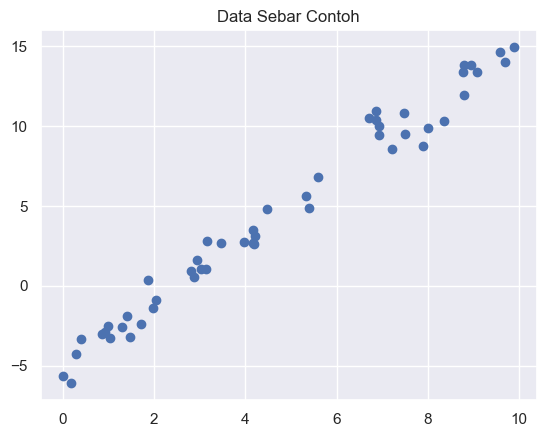

In [2]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
y = 2 * X - 5 + rng.randn(50)

# Plot data
plt.scatter(X, y)
plt.title("Data Sebar Contoh")
plt.show()

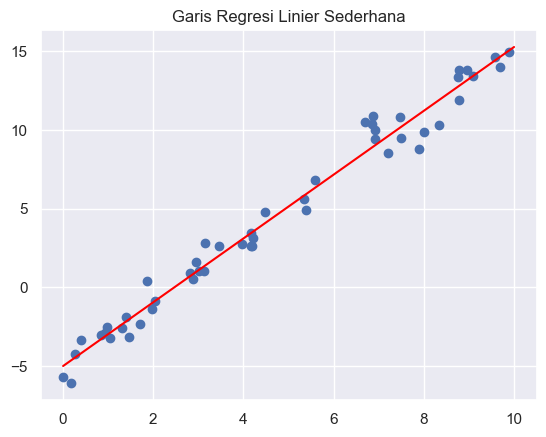

In [4]:
X_reshaped = X[:, np.newaxis] 

model = LinearRegression(fit_intercept=True)
model.fit(X_reshaped, y)

Xfit = np.linspace(0, 10, 100)[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(X, y)
plt.plot(Xfit.ravel(), yfit.ravel(), color='red')
plt.title("Garis Regresi Linier Sederhana")
plt.show()

In [5]:
print("Model Slope:", model.coef_[0])
print("Model Intercept:", model.intercept_)

Model Slope: 2.027208810360695
Model Intercept: -4.998577085553202


In [6]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) 
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print("Model Intercept:", model.intercept_)
print("Model Koefisien (Slope):", model.coef_)

Model Intercept: 0.5000000000000127
Model Koefisien (Slope): [ 1.5 -2.   1. ]


In [7]:
from sklearn.preprocessing import PolynomialFeatures
x_poly = np.array([2, 3, 4])[:, np.newaxis]

poly = PolynomialFeatures(3, include_bias=False)
poly_transformed = poly.fit_transform(x_poly)

print(poly_transformed)

[[ 2.  4.  8.]
 [ 3.  9. 27.]
 [ 4. 16. 64.]]


In [8]:
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

print(poly_model)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])


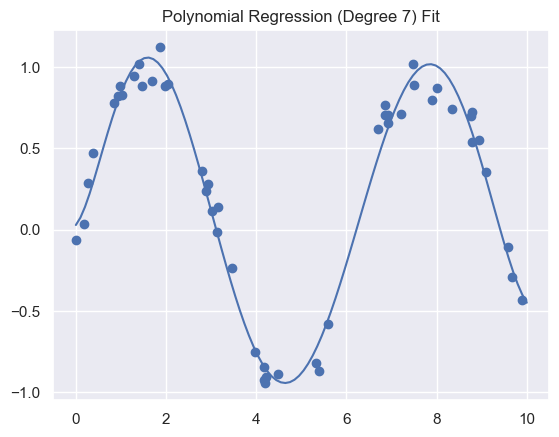

In [9]:
rng = np.random.RandomState(1)
X_sine = 10 * rng.rand(50)
y_sine = np.sin(X_sine) + 0.1 * rng.randn(50)
Xfit_sine = np.linspace(0, 10, 100)[:, np.newaxis]

poly_model.fit(X_sine[:, np.newaxis], y_sine)
yfit_sine = poly_model.predict(Xfit_sine)

plt.scatter(X_sine, y_sine)
plt.plot(Xfit_sine, yfit_sine)
plt.title("Polynomial Regression (Degree 7) Fit")
plt.show()

In [10]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

print("Kelas GaussianFeatures didefinisikan.")


Kelas GaussianFeatures didefinisikan.


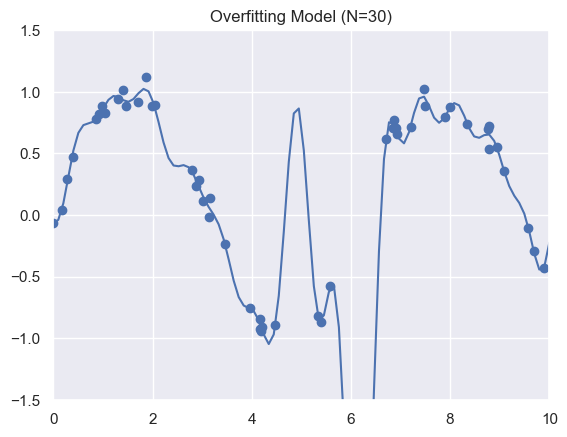

In [11]:
model_overfit = make_pipeline(GaussianFeatures(30),
                              LinearRegression())
                      
model_overfit.fit(X_sine[:, np.newaxis], y_sine)

plt.scatter(X_sine, y_sine)
plt.plot(Xfit_sine, model_overfit.predict(Xfit_sine))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.title("Overfitting Model (N=30)")
plt.show()

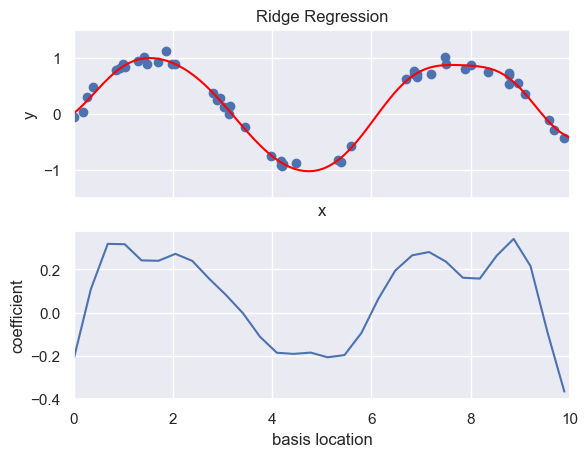

In [12]:
from sklearn.linear_model import Ridge

def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(X_sine[:, np.newaxis], y_sine)
    
    ax[0].scatter(X_sine, y_sine)
    ax[0].plot(Xfit_sine, model.predict(Xfit_sine), color='red')
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))
    plt.show()

model_ridge = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model_ridge, title='Ridge Regression')

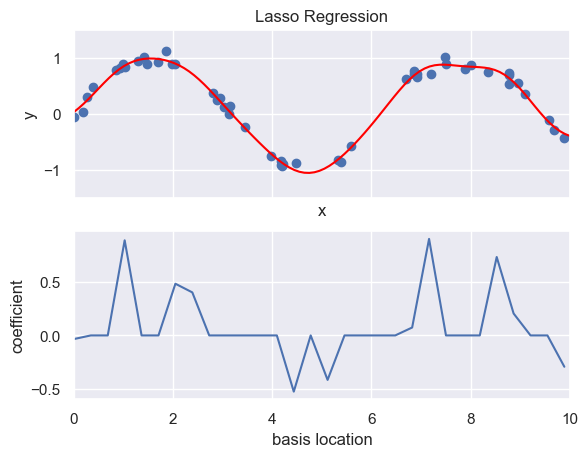

In [13]:
from sklearn.linear_model import Lasso

model_lasso = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001, max_iter=10000)) # max_iter ditingkatkan untuk konvergensi
basis_plot(model_lasso, title='Lasso Regression')

In [7]:
# Poin 13: Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd

In [20]:
df = pd.read_excel("M03 dataset Covid.xlsx")
df.head()

,Date,Suspect
0,2021-06-24,157
1,2021-06-25,163
2,2021-06-26,139
3,2021-06-27,89
4,2021-06-28,145


In [21]:
df.isnull().sum()


Date       0
Suspect    0
dtype: int64

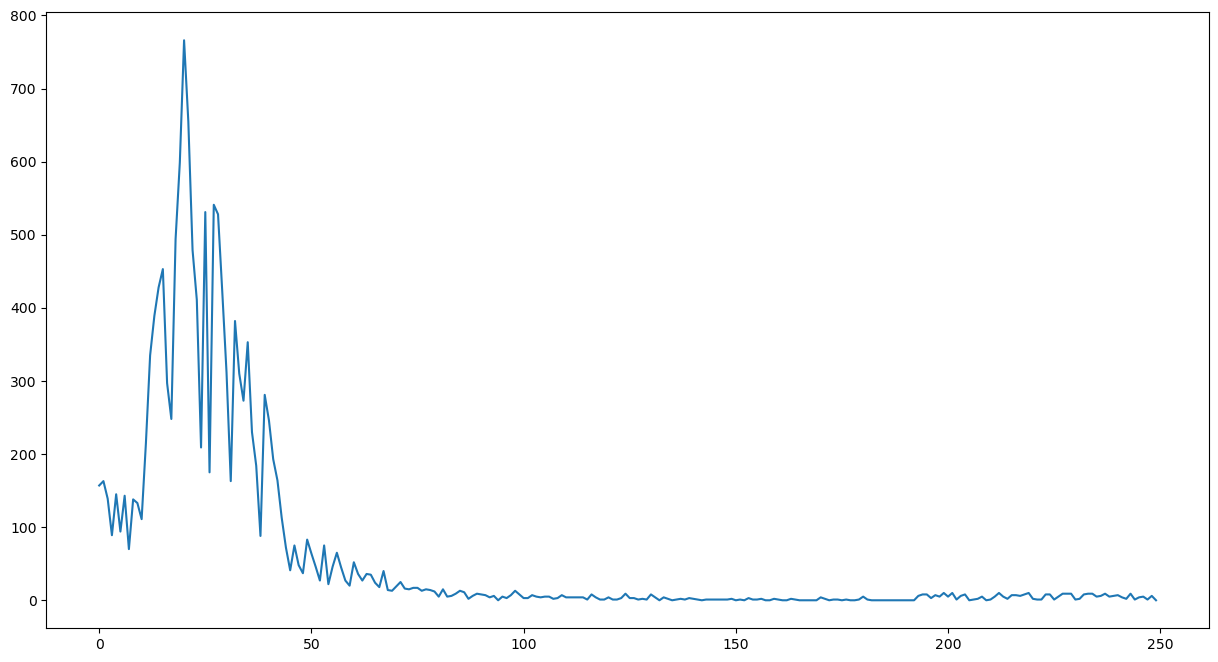

In [22]:
plt.figure(figsize=(15,8))
plt.plot(df['Suspect'])
plt.show()

In [23]:
df['Date'] = df.index

In [26]:
df["Date"] = df[("Date")].values.astype("float64")


In [27]:
column = ["Date", "Suspect"]
x = df[column]
y = df["Suspect"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [30]:
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [31]:
model = LinearRegression(fit_intercept = False)
model.fit(x,y)
df['Prediction'] = model.predict(x)


<Axes: >

<Figure size 1500x800 with 0 Axes>

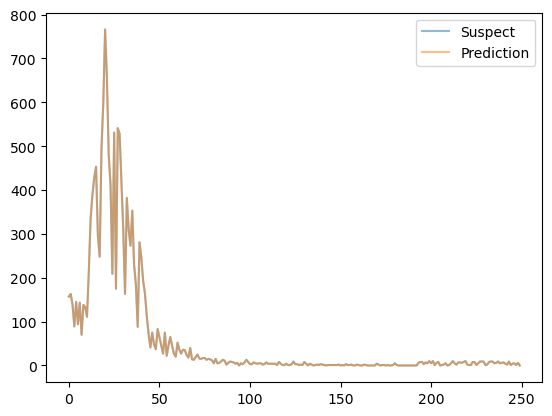

In [32]:
plt.figure(figsize=(15,8))
df[['Suspect','Prediction']].plot(alpha = 0.5)

In [33]:
params = pd.Series(model.coef_, index = x.columns)
params

Date       3.997200e-16
Suspect    1.000000e+00
dtype: float64

In [34]:
print("Model Slope: ",model.coef_[0])
print("Model Intercept: ", model.intercept_)

Model Slope:  3.997199716503446e-16
Model Intercept:  0.0


In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error',
                        cv = folds, 
                        return_train_score = True, 
                        verbose = 1)

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
cv_results = pd.DataFrame(model_cv.cv_results_)
print(cv_results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.002005      0.001203         0.000953        0.000150       0.0001   
1       0.001706      0.000756         0.001513        0.000471       0.0010   
2       0.001610      0.000281         0.001144        0.000378       0.0100   
3       0.001073      0.000029         0.000775        0.000071       0.0500   
4       0.001047      0.000025         0.000744        0.000026       0.1000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -3.992334e-09      -5.723586e-09      -3.158465e-09   
1   {'alpha': 0.001}      -3.992393e-08      -5.723671e-08      -3.158469e-08   
2    {'alpha': 0.01}      -3.992403e-07      -5.723678e-07      -3.158470e-07   
3    {'alpha': 0.05}      -1.996202e-06      -2.861839e-06      -1.579235e-06   
4     {'alpha': 0.1}      -3.992403e-06      -5.723678e-06      -3.158470e-06   

   split3_test_score  ...  mean_

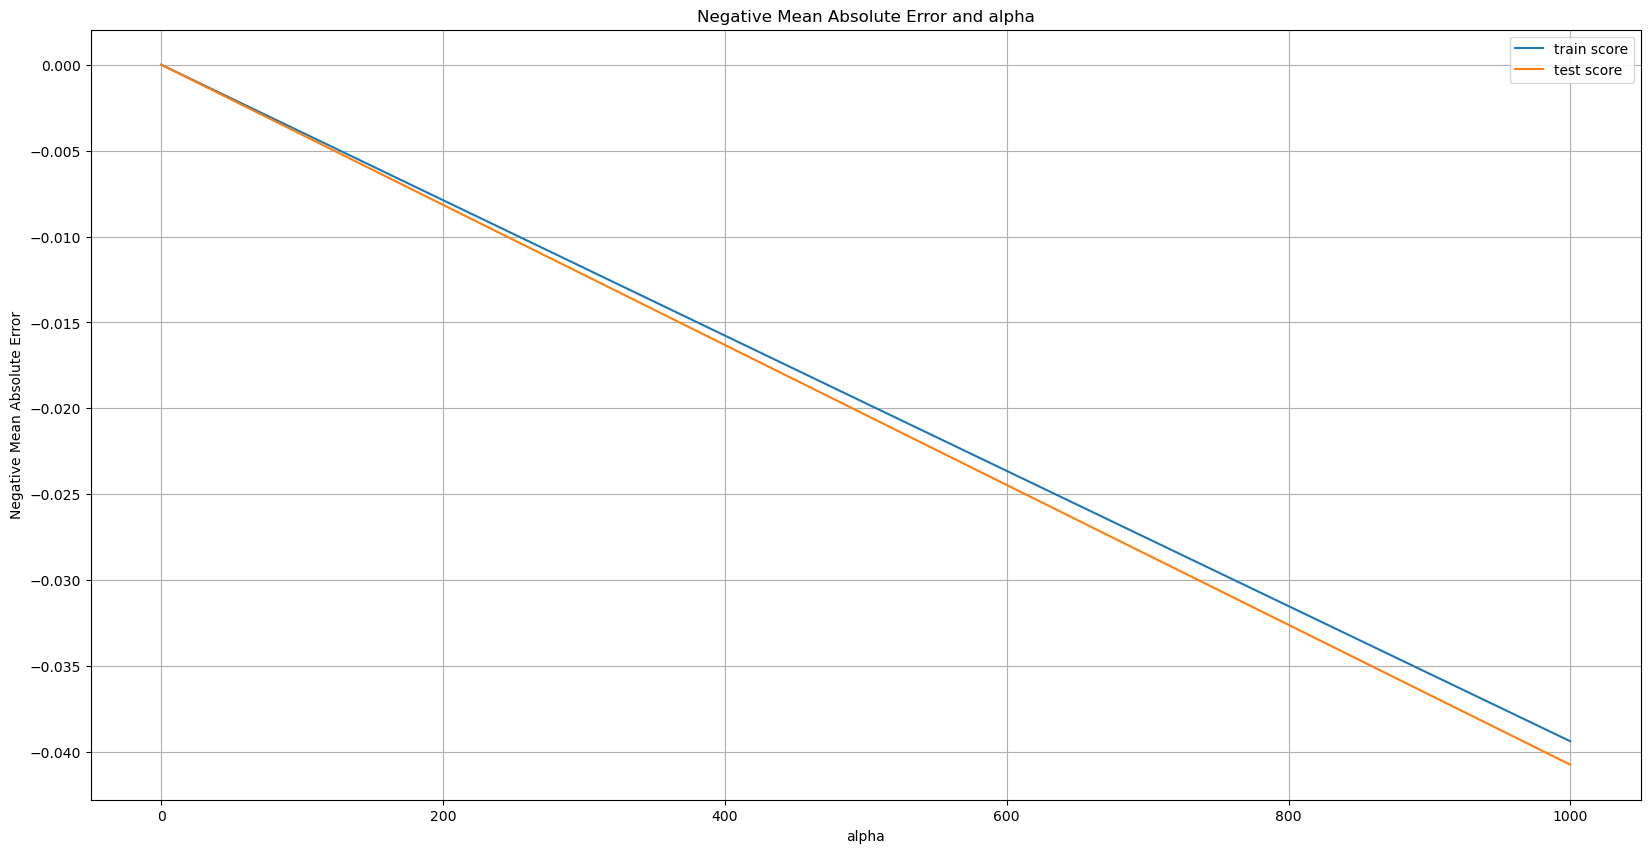

In [38]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

plt.figure(figsize=(20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

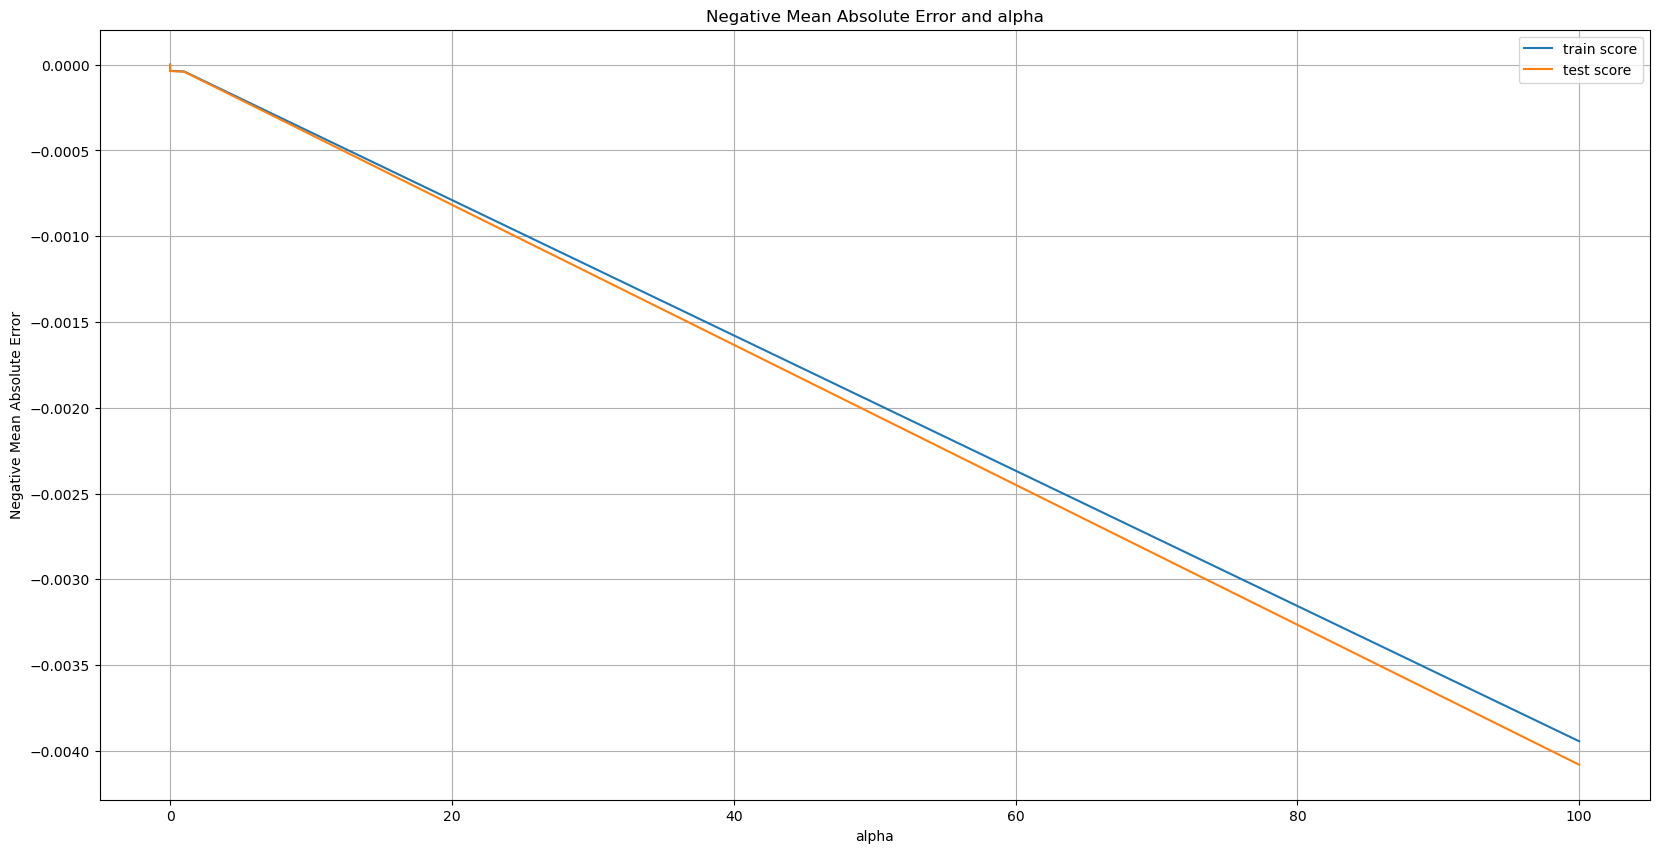

In [39]:
cv_results = cv_results[cv_results['param_alpha'] <= 200]

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')
plt.figure(figsize = (20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

In [42]:
alpha = 15
ridge = Ridge(alpha = alpha)
ridge.fit(x_train, y_train)
print("Ridge Coefficients:", ridge.coef_)

imp_ridge = pd.DataFrame({
    "Varname": x.columns,
    "Coefficient" : ridge.coef_
})
print("\nSorted Coefficients:")
print(imp_ridge.sort_values(by = "Coefficient", ascending = False))

Ridge Coefficients: [-6.64007019e-06  9.99993941e-01]

Sorted Coefficients:
   Varname  Coefficient
1  Suspect     0.999994
0     Date    -0.000007


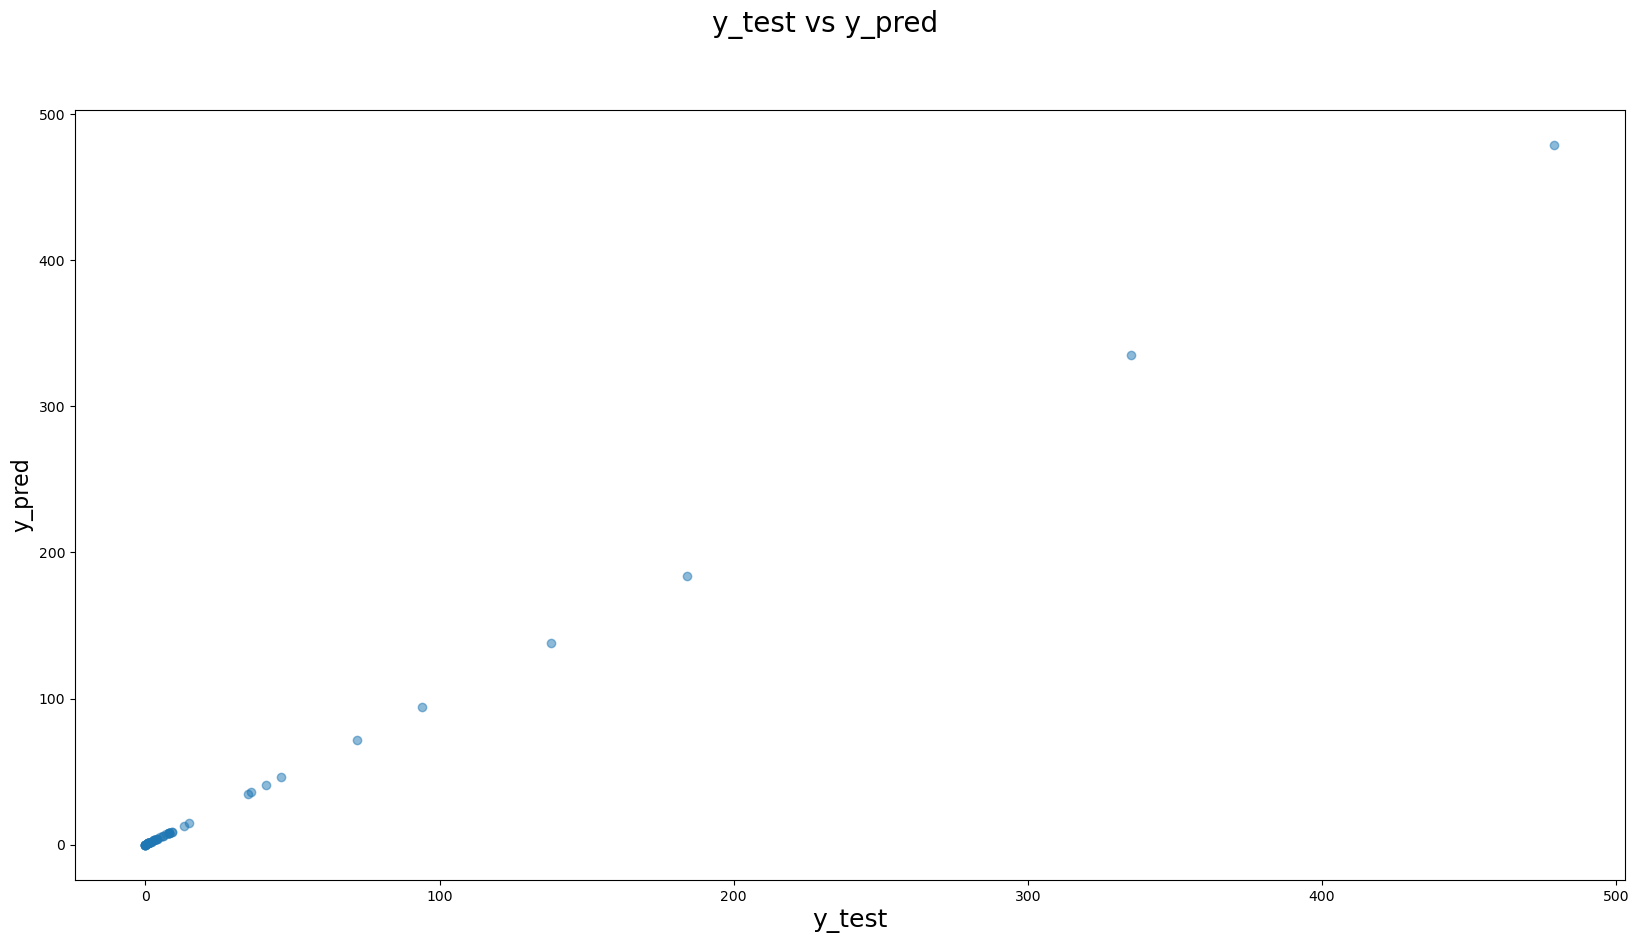

In [44]:
y_pred = ridge.predict(x_test)

fig = plt.figure(figsize = (20, 10))
plt.scatter(y_test, y_pred, alpha = .5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [45]:
df_pred = pd.DataFrame({'Actual' : y_test, 'Predictions' : y_pred})
df_pred['Predictions'] = round(df_pred['Predictions'], 2)
print(df_pred.head(15)) 

     Actual  Predictions
225       1          1.0
122       1          1.0
92        4          4.0
157       0          0.0
154       1          1.0
161       0          0.0
198       5          5.0
83        6          6.0
63       36         36.0
155       1          1.0
218       8          8.0
231       2          2.0
108       3          3.0
186       0         -0.0
116       8          8.0


In [47]:
from sklearn import metrics

print("metrics.explained_variance_score(y_test, y_pred):", metrics.explained_variance_score(y_test, y_pred))

print("metrics.mean_absolute_error(y_test, y_pred):", metrics.mean_absolute_error(y_test, y_pred))

print("metrics.max_error(y_test, y_pred):", metrics.max_error(y_test, y_pred))

print("metrics.mean_squared_error(y_test, y_pred):", metrics.mean_squared_error(y_test, y_pred))

print("metrics.r2_score(y_test, y_pred):", metrics.r2_score(y_test, y_pred))

metrics.explained_variance_score(y_test, y_pred): 0.9999999999730012
metrics.mean_absolute_error(y_test, y_pred): 0.0003913572933185018
metrics.max_error(y_test, y_pred): 0.0018246407324795655
metrics.mean_squared_error(y_test, y_pred): 2.376950004771142e-07
metrics.r2_score(y_test, y_pred): 0.9999999999673318


In [49]:
from sklearn.linear_model import Lasso

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
max_iter = [1, 10, 100]

lasso_gscv = GridSearchCV(estimator = Lasso(), 
                          param_grid = {'alpha': alpha, 'max_iter': max_iter},
                          scoring = 'neg_mean_absolute_error',
                          cv = 5,
                          refit = True)

# Fit the model (menggunakan seluruh data X dan y sesuai kode di docx)
lasso_gscv.fit(x, y)

print("Best Parameters for Lasso:", lasso_gscv.best_params_)

Best Parameters for Lasso: {'alpha': 0.0001, 'max_iter': 100}


In [51]:
lasso = Lasso(alpha = lasso_gscv.best_params_['alpha'], 
              max_iter = lasso_gscv.best_params_['max_iter'])

# Latih model menggunakan data latih yang sudah di-split
lasso.fit(x_train, y_train)

print(lasso)

Lasso(alpha=0.0001, max_iter=100)


In [53]:
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))

Training set score: 1.00
Test set score: 1.00


In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Provide known inputs (x) and output (y)
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]

# Convert lists to numpy arrays
x, y = np.array(x), np.array(y)

In [55]:
print(x)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]


In [56]:
print(y)


[ 4  5 20 14 32 22 38 43]


In [57]:
model = LinearRegression().fit(x, y)

In [58]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8615939258756775
intercept: 5.52257927519819
slope: [0.44706965 0.25502548]


In [59]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep = '\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [60]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis = 1)
print('preedicted response:', y_pred, sep = '\n')

preedicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [61]:
x_new = np.arange(10).reshape((-1, 2))
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [62]:
y_new = model.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


In [63]:
import numpy as np
import statsmodels.api as sm

In [64]:
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [65]:
x = sm.add_constant(x)

In [66]:
print(x)
print(y)

[[ 1.  0.  1.]
 [ 1.  5.  1.]
 [ 1. 15.  2.]
 [ 1. 25.  5.]
 [ 1. 35. 11.]
 [ 1. 45. 15.]
 [ 1. 55. 34.]
 [ 1. 60. 35.]]
[ 4  5 20 14 32 22 38 43]


In [67]:
model = sm.OLS(y, x)

In [68]:
results = model.fit()

In [69]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Sun, 28 Sep 2025   Prob (F-statistic):            0.00713
Time:                        01:56:36   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

In [70]:
print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

coefficient of determination: 0.8615939258756777
adjusted coefficient of determination: 0.8062314962259488
regression coefficients: [5.52257928 0.44706965 0.25502548]


In [71]:
print('predicted response:', results.fittedvalues, sep = '\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [72]:
print('predicted response:', results.predict(x), sep = '\n')

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [74]:
x_new = sm.add_constant(np.arange(10).reshape(-1, 2))
print(x_new)

[[1. 0. 1.]
 [1. 2. 3.]
 [1. 4. 5.]
 [1. 6. 7.]
 [1. 8. 9.]]


In [75]:
y_new = results.predict(x_new)
print(y_new)

[ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [77]:
data = pd.read_csv("M03 dataset bank.csv", header = 0) 
data = data.dropna()
print(data.shape)
print(list(data.columns))
data.head()

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [79]:
data['education'].unique()

data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

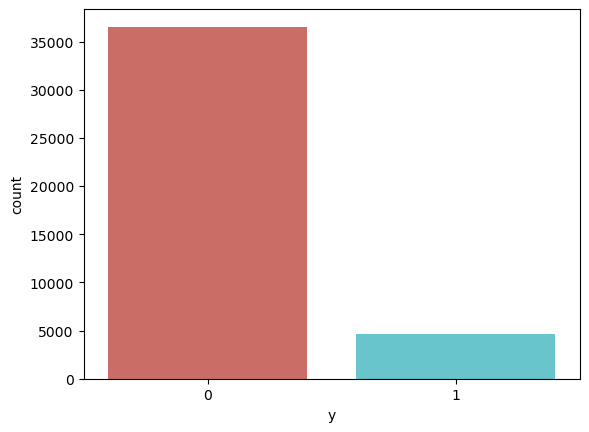

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


TypeError: agg function failed [how->mean,dtype->object]

In [80]:
data['y'].value_counts()
sns.countplot(x = 'y', data = data, palette = 'hls')
plt.show()

count_no_sub = len(data[data['y'] == 0]) 
count_sub = len(data[data['y'] == 1])  

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

data.groupby('y').mean()


In [81]:
data.groupby('job').mean()
data.groupby('marital').mean()
data.groupby('education').mean()


TypeError: agg function failed [how->mean,dtype->object]

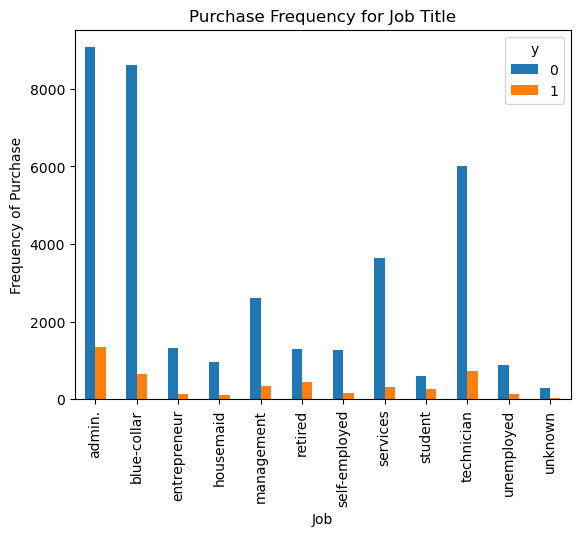

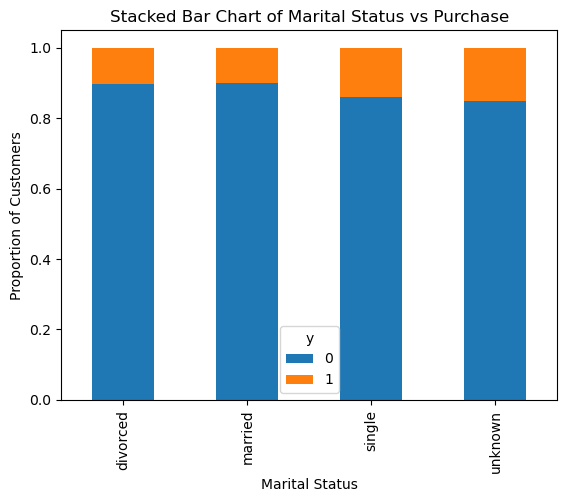

In [82]:
# Poin 53: Plot the purchase frequency (Job vs y, Marital vs y)
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')
plt.show()

table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')
plt.show()

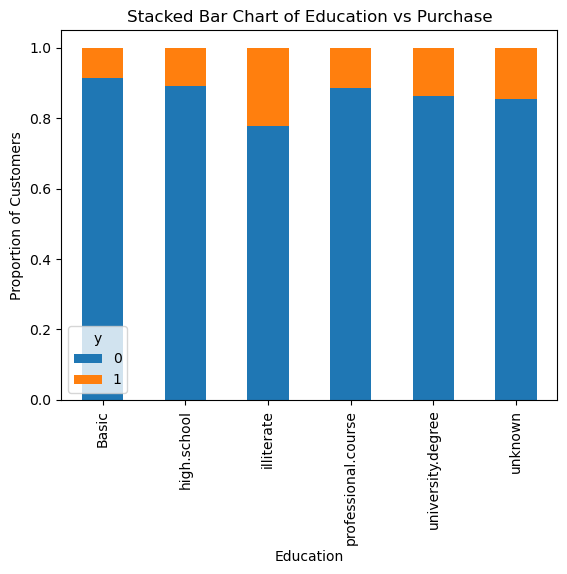

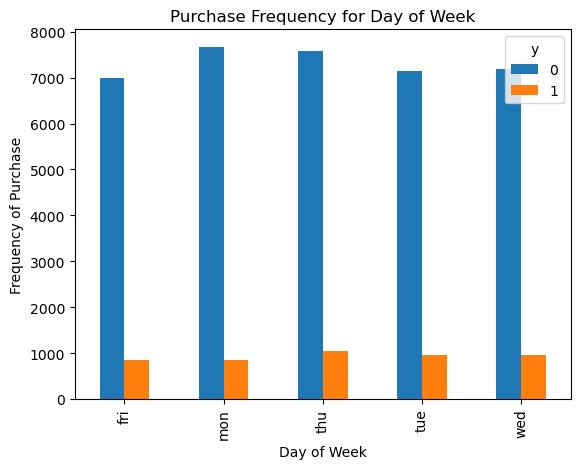

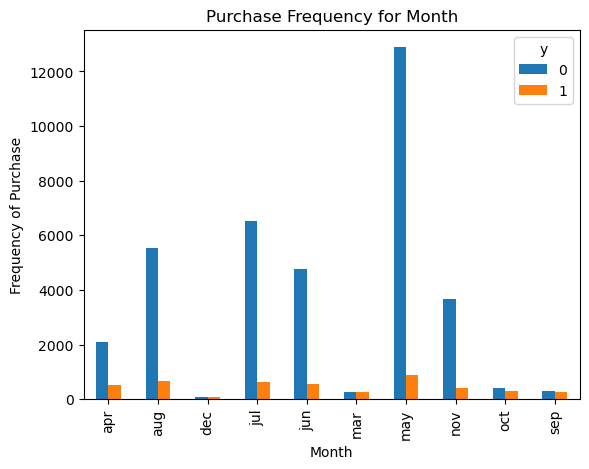

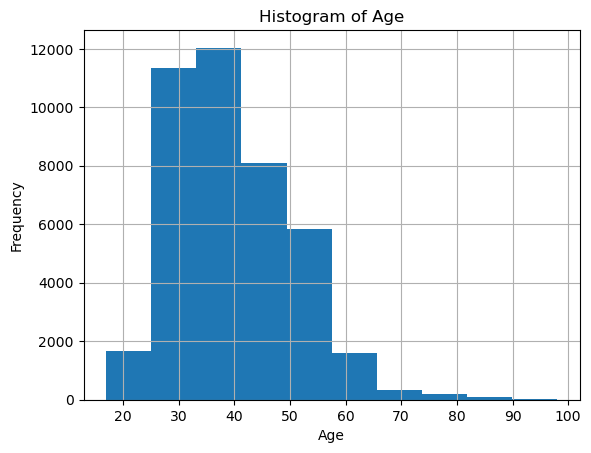

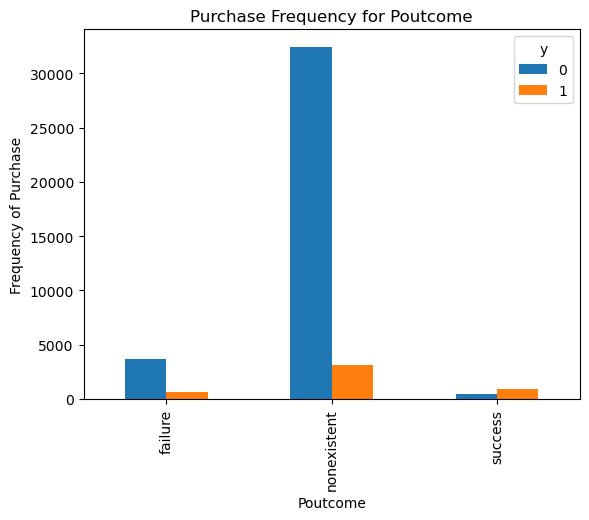

In [83]:
# Poin 54: Plot education, day of week, and month
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')
plt.show()

pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_dayofweek_bar')
plt.show()

pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')
plt.show()

data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')
plt.show()

pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')
plt.show()

In [87]:
# Poin 55: Create dummy variables
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [88]:
# Poin 56: Split the dataset into data training and data testing
from sklearn.model_selection import train_test_split

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

# Lanjutkan pemisahan train/test yang digunakan untuk model Scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [89]:
# Poin 57: Fit the Logistic Regression model (Statsmodels)
import statsmodels.api as sm
# statsmodels butuh konstanta (intercept) secara eksplisit
X_sm = sm.add_constant(X)
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()
print(result.summary2())

# Poin 57: Fit the Logistic Regression model (Scikit-learn)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [90]:
# Poin 58: Predict the test set result and calculate the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

NameError: name 'logreg' is not defined

In [91]:
# Poin 59: Print the result from confusion matrix and classification report
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [12357, 8]